In [211]:
import pandas as pd
import numpy as np

In [357]:
prices = pd.read_csv(
            # '/home/william/Dropbox/Thesis/mthReturns.csv',
            'C:/Users/willi/Dropbox/Thesis/mthReturns.csv',
            index_col=0,
            header=0)
prices = prices.drop(['SPXT'], axis=1)
prices.index = pd.to_datetime(prices.index)
prices = prices.sort_index()
colNames = ['High Yield',
            'Investment Grade',
            'Commodities',
            'Russell 2000',
            'Russell 1000']
prices.columns = colNames
display(prices.head())

,High Yield,Investment Grade,Commodities,Russell 2000,Russell 1000
Date,,,,,
1983-07-29,98.21,200.49,53.6360,119.5855,90.9526
1983-08-31,99.41,201.55,58.0218,114.7932,91.4312
1983-09-30,101.94,208.85,56.4019,116.6039,92.6432
1983-10-31,102.91,208.76,53.4022,108.4035,90.4636
1983-11-30,103.62,211.27,54.4145,113.8557,92.2843


### Prices
We consider time series on five asset classes, namely:

* High Yield (HY)
* Investment Grade (IG)
* Commodities (C)
* Russell 2000 (R2)
* Russell 1000 (R1)

In particular, we consider the development in the **prices** of these assets over the period `1983-07-29` to `2018-12-31`.

We note below that prices have been increasing steadily over the period.

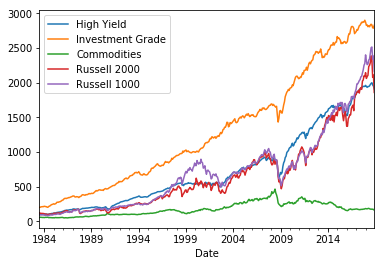

In [358]:
prices.plot()

### Risk Free investment

The risk-free investment is an investment into an asset which is deemed practically impossible to lose money on. The typical bet is a 10 year US government bond or the German 10 year bund.

For the risk free asset, we have to remember to divide by `100`, as the time series reflects interest (in percent, not decimal points) of investment in the risk free asset.

In [351]:
rf_data = pd.read_csv(
            # '/home/william/Dropbox/Thesis/rf.csv',
            'C:/Users/willi/Dropbox/Thesis/rf.csv',
            index_col=0,
            header=0
        )
rf_data = rf_data / 100.0
rf_data.index = pd.to_datetime(rf_data.index)
rf_data = rf_data.sort_index()
rf_data.head()

,RF
Date,
1983-07-29,0.0074
1983-08-31,0.0076
1983-09-30,0.0076
1983-10-31,0.0076
1983-11-30,0.0070


##### Quantitative easing

We note in the risk free asset that the interest fell to approximately zero over the period of 2009 to 2016. This is of course a reflection of quantitative easing, the stimulus package provided by the US Federal Reserve to incentivise investments from a funding cost perspective.

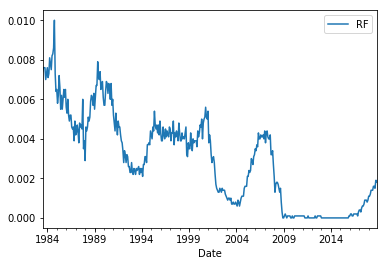

In [375]:
rf_data.plot()

### Returns on our assets

We compute returns by the logarithmic method, i.e.

$$ r_t = \log\left(\frac{p_t}{p_{t-1}}\right), $$

where $p_t$ is the price at time $t$.

We note that the first period will not have a lagged price, and thus the computation returns an `NAN`. This has to be removed.

In [361]:
returns = np.log(prices/prices.shift(1))
returns = returns.dropna()
display(returns.head())
display(returns.tail())

,High Yield,Investment Grade,Commodities,Russell 2000,Russell 1000
Date,,,,,
1983-08-31,0.012145,0.005273,0.078598,-0.040899,0.005248
1983-09-30,0.025132,0.035579,-0.028316,0.015650,0.013169
1983-10-31,0.009470,-0.000431,-0.054651,-0.072922,-0.023808
1983-11-30,0.006876,0.011952,0.018779,0.049071,0.019926
1983-12-30,-0.006778,-0.003129,0.013858,-0.021108,-0.012308


,High Yield,Investment Grade,Commodities,Russell 2000,Russell 1000
Date,,,,,
2018-08-31,0.007347,0.004927,-0.017864,0.042170,0.033877
2018-09-28,0.005555,-0.003572,0.018995,-0.024348,0.003790
2018-10-31,-0.016114,-0.014712,-0.021824,-0.114980,-0.073392
2018-11-30,-0.008640,-0.001666,-0.005647,0.015676,0.020140
2018-12-31,-0.021646,0.014599,-0.071363,-0.126520,-0.095539


##### Left skew in returns

In alignment with financial theory, we note a left-skew in the returns, that is, we note more returns that are severely negative as opposed to strongly positive.

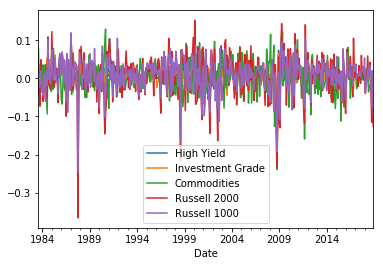

In [354]:
returns.plot()

### Excess returns

In order to compute excess returns we must subtract the risk free rate from each of our 5 assets.

We need the risk free return data to be a regular array in order to subtract this from returns on our assets, as the data frame does not provide an obvious approach to this subtraction.

In addition, we must remove the first observation, as we have no returns computed for August 29th in our returns data set.

In [370]:
rf = np.array(rf_data.iloc[1:,0])
display(pd.DataFrame(rf[:5], columns=['RF']).head())
display(rf_data.head(6))

,RF
0,0.0076
1,0.0076
2,0.0076
3,0.0070
4,0.0073


,RF
Date,
1983-07-29,0.0074
1983-08-31,0.0076
1983-09-30,0.0076
1983-10-31,0.0076
1983-11-30,0.0070
1983-12-30,0.0073


In [372]:
excess_returns = returns.sub(rf, axis = 0)
display(excess_returns.head())
display(excess_returns.tail())

,High Yield,Investment Grade,Commodities,Russell 2000,Russell 1000
Date,,,,,
1983-08-31,0.004545,-0.002327,0.070998,-0.048499,-0.002352
1983-09-30,0.017532,0.027979,-0.035916,0.008050,0.005569
1983-10-31,0.001870,-0.008031,-0.062251,-0.080522,-0.031408
1983-11-30,-0.000124,0.004952,0.011779,0.042071,0.012926
1983-12-30,-0.014078,-0.010429,0.006558,-0.028408,-0.019608


,High Yield,Investment Grade,Commodities,Russell 2000,Russell 1000
Date,,,,,
2018-08-31,0.005747,0.003327,-0.019464,0.040570,0.032277
2018-09-28,0.004055,-0.005072,0.017495,-0.025848,0.002290
2018-10-31,-0.018014,-0.016612,-0.023724,-0.116880,-0.075292
2018-11-30,-0.010440,-0.003466,-0.007447,0.013876,0.018340
2018-12-31,-0.023546,0.012699,-0.073263,-0.128420,-0.097439


##### Heavy left skew in excess returns

Again, plotting the time series we see a heavy negative tail, implying that negative outliers were more negative (and perhaps more frequent also) than positive outliers. This is a stylized fact.

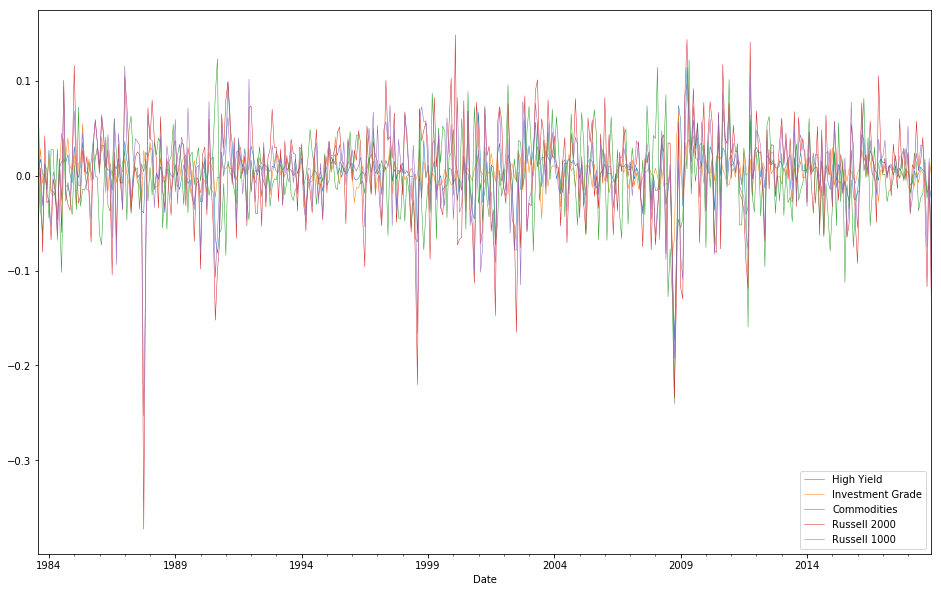

In [374]:
excess_returns.plot(linewidth = 0.5, figsize = (16,10))

The above data are likewise compiled in a script I call "genData.py". What we have generated is:

* monthly prices (prices)
* monthly returns (returns)
* monthly excess returns (excess_returns)
* monthly risk-free rate (rf_data)

The goal is to use this data as ground for comparison with existing data.

We use data up until and including December 2017 to estimate a 2-state multivariate Hidden Markov Model (HMM). This model is written as:

$$
Y_t = \Omega_{s_t}^{1/2} z_t, \\
\Omega_{s_t} = \omega_{s_t} + \alpha Y_{t-1}^2, \\
s_t \in \{1, 2\}, \quad \forall t \geq 0, \\
z_t = 
\begin{pmatrix} 
    \varepsilon_t^{(1)} & 0 & 0 & 0 & 0 \\
    0 & \varepsilon_t^{(2)} & 0 & 0 & 0 \\
    0 & 0 & \varepsilon_t^{(3)} & 0 & 0 \\
    0 & 0 & 0 & \varepsilon_t^{(4)} & 0 \\
    0 & 0 & 0 & 0 & \varepsilon_t^{(5)}
\end{pmatrix}, \quad \varepsilon_t^{(i)} \sim \text{iid}\mathbf{N}(0,1), \quad \forall i\in \{1,2,3,4,5\}.
$$


### Estimated parameters

Estimating parameters up until and including December 2017 in Matlab, we find the following.

In [377]:
cols = {1, 2}
idx = colNames
mu = np.array([
    [0.3815, 0.1523],
    [0.1875, 0.3174],
    [0.0048, 0.0190],
    [0.4185, -0.4411],
    [0.6141, -0.1652]
])

mu_df = pd.DataFrame(mu, columns = cols, index = idx)

cov = np.array([
    [
        [1.97569, 1.38601, 0.37623, 2.90098, 2.50570],
        [1.38601, 2.15937, -0.36313, 1.08337, 1.59527],
        [0.37623, -0.36313, 11.51764, 2.04866, 1.19757],
        [2.90098, 1.08337, 2.04866, 15.98839, 10.02691],
        [2.50570, 1.59527, 1.19757, 10.02691, 9.22943]
    ],
    [
        [15.76381, 3.35970, 5.91590, 21.88487, 15.67456],
        [3.35970, 3.23990, 1.40257, 2.59855, 2.58191],
        [5.91590, 1.40257, 31.17319, 9.71158, 7.74556],
        [21.88487, 2.59855, 9.71158, 69.81108, 47.04726],
        [15.67456, 2.58191, 7.74556, 47.04726, 41.68768]
    ]
])

covs = [pd.DataFrame(
    cov[i],
    index=colNames,
    columns=colNames
    ) for i in range(cov.shape[0])]

mask = np.ones_like(cov[0])
mask[np.triu_indices_from(mask)] = False  # False error call

probs = np.array([
    [0.95, 0.13],
    [0.05, 0.87]
])

#### Means

Means are positive in all states for bonds and commodities, and negative for equities.

*Commodities* have a really low return on average, and effectively zero in state 1.

*Russell 2000* has worse returns on average in the negative state, than they are good in the positive state. Luckily for investors in Russell 2000 the positive state is predominant in our data set, meaning returns accummulate positively.

The rest - have a look at the heat map below

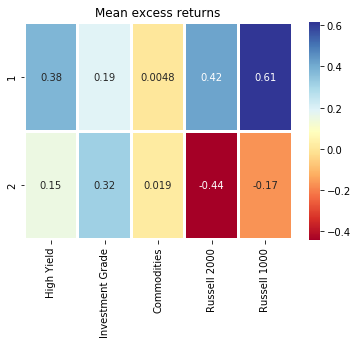

In [378]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(
    mu_df.T, annot=True, cmap='RdYlBu', linewidths=2
)
plt.title('Mean excess returns')
plt.show()

#### Covariance matrix

State 2 is associated with higher volatility across the board even covariances are all larger in state 2

*Russell 2000* is particularly affected by high variance, but it is true for equities in general that they are more variable than bonds

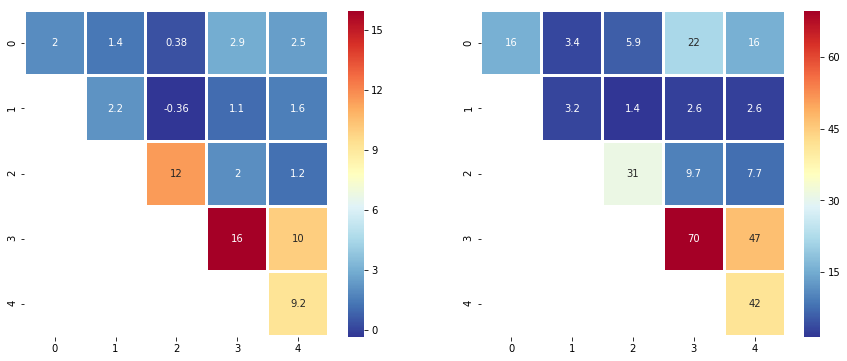

In [379]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
for i, ax in enumerate(axes.flat):
    sns.heatmap(
        cov[i], annot=True, cmap='RdYlBu_r', mask=mask, linewidths=2, ax=ax
    )
plt.show()

#### Transition matrix

State 1 is more persistant, with an average duration of $1 / (1 - 0.95) = 20$ months, as opposed to state 2 with an average duration of 7.7 months.

In [380]:
print('From column index to row, i.e. with probability: ', probs[0,1], "we go from state 2 to state 1")
pd.DataFrame(probs, index = [1,2], columns = [1,2])

From column index to row, i.e. with probability:  0.13 we go from state 2 to state 1


,1,2
1,0.95,0.13
2,0.05,0.87


## Simulating states

Now that we have a matrix of state-means (excess) and likewise matrices of covariances, we are ready to simulate states processes.

From the probability matrix:

$$ \mathbf{P} = \begin{pmatrix} p_{11} & 1 - p_{22} \\ 1 - p_{11} & p_{22} \end{pmatrix}, $$

we have that, starting in state 1, we stay in state 2 with 95\% probability.  To simulate a path which switches with 95\% from state 1 to state 2 we use uniform random numbers.

Specifically, we draw a random uniform number $u\in[0,1]$. This number, since it is uniform random on the unit interval $[0,1]$, has a 95\% chance of being 0.95 or lower. Thus, if we start the simulation in state 1 and we draw $u^{(1)} \in (0.95,1.00]$ we switch over to state 2. Likewise, if we start in state 2 and draw $u\in (0.87,1.00]$ then we switch to state 1.

This is the function we have defined below.

In [107]:
from numba import jit

@jit(nopython=True)
def stateSim(S, M, start, probs, T, u, seed=12345):
    np.random.seed(seed)
    statePaths = np.ones((M, T)) * start
    state = np.ones(S)
    stateFreq = np.ones((M, S))
    for m in range(M):
        for t in range(T-1):
            # i defines state we are arriving from
            i = int(statePaths[m, t] - 1)
            for s in range(S):
                # Identifies which state we transition to
                state[s] = (np.sum(probs[:s, i]) < u[m, t] <= np.sum(probs[:s+1, i]))*(s+1)
            statePaths[m, t+1] = np.sum(state)
        for s in range(S):
            stateFreq[m, s] = np.sum(statePaths[m] == s + 1)
    return statePaths, stateFreq

##### Performing the simulation

The function above is general to allow for any amount of states. We need parameters:

* S: Amount of states (2 in this case)
* M: Amount of simulations (we use 50,000 as a default)
* start: Which state we start in (1 or 2)
* T: Investment horizon in months (e.g. 12 months is 1 year)

We repeat the simulation for starting states 1 and 2 respectively.

In [381]:
S, M, start, T = 2, 50000, 1, 12
u = np.random.random((M,T))

sp1, sf1 = stateSim(S, M, start, probs, T, u)
sp2, sf2 = stateSim(S, M, 2, probs, T, u)

##### Reversion

Starting in state 1 means that we must see an increasing probability of ending in state 2 and vice versa. The below plots are the averages over 50,000 simulated state paths, for each month in the investment horizon.

Starting in state 1 and with just 5 pct. probability of exiting state 1 in any given month we still see that we do indeed end in state 2 25 pct. of the time. Likewise, starting in state 2 we find ourselves transition to state 1 with increasing probability, having approximately 65 \% chance of ending in state 1.

$$ (\pi * 1 + (1 - \pi) * 2) = 1.25 \Leftrightarrow \\
1.25 - 2 = -\pi \\
\pi = 0.75$$


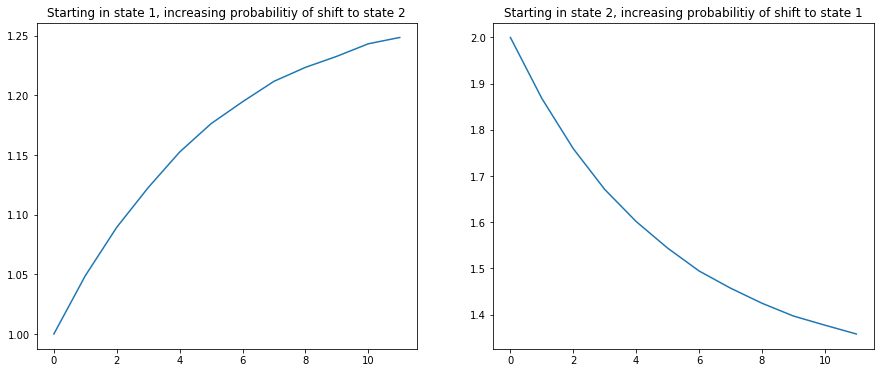

In [382]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
ax1.plot(sp1.mean(axis=0))
ax1.set_title('Starting in state 1, increasing probabilitiy of shift to state 2')
ax2.plot(sp2.mean(axis=0))
ax2.set_title('Starting in state 2, increasing probabilitiy of shift to state 1')
plt.show()

## Simulating returns

In addition to states, to filter through means and covariances for each state, and ultimately produce return series. See model specification for returns and volatility dynamics. We continue the assumption of a multivariate standard Gaussian model, conditional on the state.

In [384]:
@jit
def returnSim(S, M, N, A, start, mu, cov, probs, T, u, seed=12345):
    np.random.seed(seed)
    states, freq = stateSim(S, M, start, probs, T, u)
    returns = np.zeros((M*N, A, T))
    for m in range(M):
        for n in range(N):
            for s in range(S):
                returns[m*N + n, :, states[m] == s + 1] = \
                    np.random.multivariate_normal(
                        mu[:, s], cov[s], int(freq[m, s])
                    )
    return returns, states

We need the following variables to execute the simulation:

* A: amount of assets (excl. risk free rate - we are not simulating that)
* N: amount of simulated return paths per simulated state (1 by default)

Again, we repeat the simulation for each of the two possible starting states.

In [385]:
A, N = len(colNames), 1

start1 = 1
start2 = 2

import time

t0 = time.time()
ret1, s1 = returnSim(S, M, N, A, start1, mu, cov, probs, T, u)
t1 = time.time()
print('First returns computed in {}'.format(np.round(t1-t0, 4)), 'seconds.')

t0 = time.time()
ret2, s2 = returnSim(S, M, N, A, start2, mu, cov, probs, T, u)
t1 = time.time()
print('Second returns computed in {}'.format(np.round(t1-t0, 4)), 'seconds.')

First returns computed in 35.7562 seconds.
Second returns computed in 34.2297 seconds.


With the returns simulated, we can now plot the average simulation (remember, we generated 50,000 possible outcomes of a return path of 12 months). 

#### Starting from state 1
The result, given below, shows us that for High Yield, Russell 2000 and Russell 1000, we start abnormally high, and then regress to a lower level. The remaining time series does not have any clear tendency, which can be difficult to assess with just 12 months of return data. Nevertheless, if one must notice patterns, Investment Grade could be climbing.

#### Starting from state 2
High Yield, Russell 2000 and Russell 1000 have reversed to climb from an abnormally low level, Investment Grade shows falling escess returns and Commodities seem once again unaffected by the starting state.

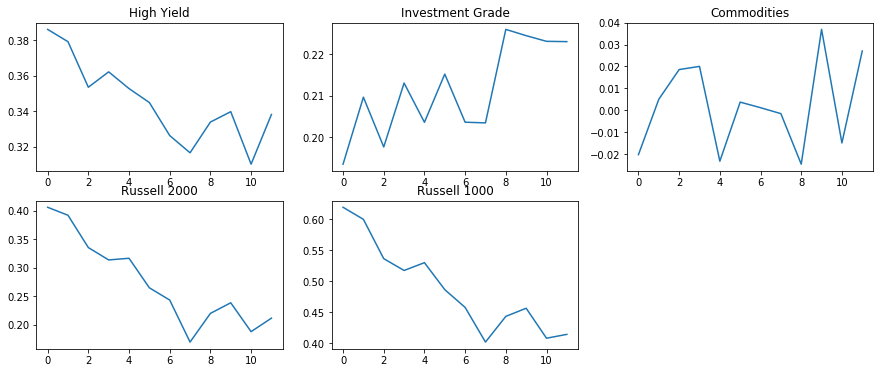

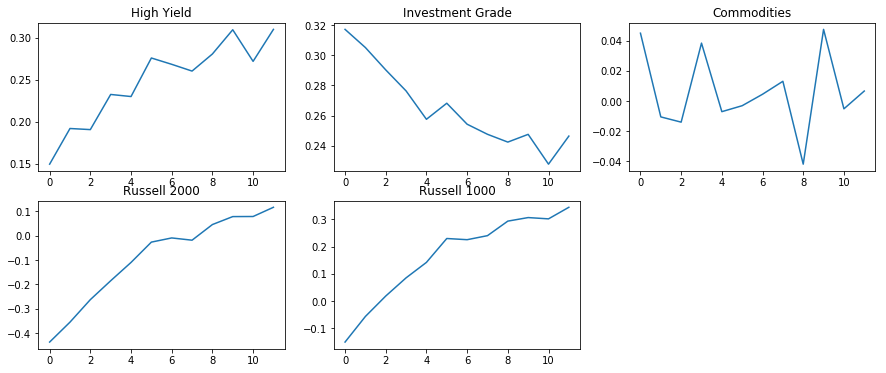

In [386]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,6))
fig.delaxes(ax=axes[1,2])
for i, ax in enumerate(axes.flat[:5]):
    ax.plot(ret1[:, i, :].mean(axis=0))
    ax.set_title(colNames[i])
plt.show()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,6))
fig.delaxes(ax=axes[1,2])
for i, ax in enumerate(axes.flat[:5]):
    ax.plot(ret2[:, i, :].mean(axis=0))
    ax.set_title(colNames[i])
plt.show()

## Optimal asset allocation

We are now ready to find the optimal asset allocation for a portfolio with investment opportunities in these five asset classes including a sixth class of the risk free asset.

To take risk aversion into account, we consider a power utility function as below:

$$ u(W) = \frac{W^{1-\gamma}}{1-\gamma}, $$

where $W$ being wealth is given by:

$$
W = (1 - \omega'\iota) \exp\left\{T\cdot RF\right\} + \omega' \exp\left\{ \left(\mathbf{R} + RF \right) \iota\right\},
$$

where $\iota = (1, 1, \dots, 1)'$ is a column unit vector matching the dimension of $\omega$ and where in turn the weights $\omega$ allocated to each asset is:

$$
\omega' = \begin{pmatrix} \omega_{HY}, \omega_{IG}, \dots, \omega_{R1} \end{pmatrix},
$$

and the returns matrix $\mathbf{R}$ is given by:
$$
\mathbf{R} = 
\begin{pmatrix}
    r^{HY}_1 & r^{HY}_2 & \dots & r^{HY}_{12} \\
    r^{IG}_1 & r^{IG}_2 & \dots & r^{IG}_{12} \\
    \vdots   & \vdots   & \ddots& \vdots      \\
    r^{R1}_1 & r^{R1}_2 & \dots & r^{R1}_{12}
\end{pmatrix}.
$$

To solve the problem, we use a constrained solver. We have the optimal allocation solves the following problem:

$$\max_{\omega} u(W), \quad \text{st. } \omega_i \in [0,1] \forall i, \quad \sum_i \omega_i = 1.$$

The function `check_sum` below ensures the latter constraint, whereas the `bnds` vector allows to check the prior constraint.

In [517]:
from scipy import optimize as opt
def check_sum(weights):
    return np.sum(weights) - 1.0

def boundedOptimiser(f, w, args, ApB, method='SLSQP'):
    bnds = tuple(zip(np.zeros(ApB), np.ones(ApB)))
    cons = ({'type': 'eq', 'fun': check_sum})
    res = opt.minimize(
        f, w, args=args, bounds=bnds, constraints=cons, method=method
    )
    return res

@jit(nopython=True)
def expectedUtilityMult(w, returns, rf, g, A, T):
    rfCR = np.exp(T * rf/100)  # rfCR: risk free compounded return
    denominator = 1 - g
    rCR = np.exp(np.sum(returns/100, axis=2))*rfCR  # rCR:  risky compounded return
    numerator = (w[A] * rfCR + np.sum(w[:A] * rCR, axis=1)) ** (1 - g)
    return -np.mean(numerator / denominator) * 100000

To solve the problem, we need to define a couple variables:

* w: set of 6 standardised weights, one for each asset including the risk free
* g: a degree of risk aversion

In addition, to loop over this, we may extend $g$ to a whole vector, same for maturities and start states.

In [518]:
maturities = np.array([3, 6, 9, 10, 12])
start_states = [1, 2]
gamma = [3,5,7,9]

# Labelling for data frames
labels = np.hstack((colNames, 'Risk Free'))
abbrev = ['HY', 'IG', 'C', 'R2', 'R1', 'RF']

# Assets to allocate weights to
a = len(labels)  # 6

# 6 standardised random weights on the unit interval
w = np.random.random(a)
w /= np.sum(w)

# Non-simulated risk free rate of return in percent
rf = 0.3

# A matrix of weights for each asset for each maturity (3 x 6)
weights = np.squeeze(list(zip(
    [np.repeat(w[i], len(maturities)) for i in range(len(w))]
))).T

# Technicality: dictionary that can contain solutions for all states and gammas
ws = {s: 
      {g: pd.DataFrame(weights.copy(), index=maturities, columns=abbrev)
       for g in gamma}
      for s in start_states}

# Technicality: Lists that contains returns of maturities 3, 6 and 12 months
R1 = [ret1[:, :, :mat] for mat in maturities]
R2 = [ret2[:, :, :mat] for mat in maturities]
R = {0: R1,
     1: R2}

# Looping; j=[0,1], s=[1,2], gamma=[3,5,7,9], i=[0,1,2], mat=[3,6,9]
for j, s in enumerate(start_states):
    print('start: ', s)
    for g in gamma:
        print('gamma: ', g)
        for i, mat in enumerate(maturities):
            args = R[j][i], rf, g, a-1, mat
            results = boundedOptimiser(expectedUtilityMult, w, args, a)
            print('weights: ', np.round(results.x, 4))
            ws[s][g].iloc[i,:] = np.round(results.x, 4)

start:  1
gamma:  3
weights:  [0. 0. 0. 0. 1. 0.]
weights:  [0.1289 0.     0.     0.     0.8711 0.    ]
weights:  [0.2926 0.     0.     0.     0.7074 0.    ]
weights:  [0.3224 0.     0.     0.     0.6776 0.    ]
weights:  [0.381 0.    0.    0.    0.619 0.   ]
gamma:  5
weights:  [0.3745 0.     0.     0.     0.6255 0.    ]
weights:  [0.5052 0.     0.     0.     0.4948 0.    ]
weights:  [0.6038 0.     0.     0.     0.3962 0.    ]
weights:  [0.621 0.    0.    0.    0.379 0.   ]
weights:  [0.6052 0.0468 0.     0.     0.3481 0.    ]
gamma:  7
weights:  [0.5761 0.     0.     0.     0.4239 0.    ]
weights:  [0.6688 0.     0.     0.     0.3312 0.    ]
weights:  [0.586 0.142 0.    0.    0.272 0.   ]
weights:  [0.5479 0.1878 0.     0.     0.2643 0.    ]
weights:  [0.4864 0.2668 0.     0.     0.2468 0.    ]
gamma:  9
weights:  [0.6888 0.     0.     0.     0.3112 0.    ]
weights:  [0.6666 0.0875 0.     0.     0.2459 0.    ]
weights:  [0.5044 0.2878 0.     0.     0.2079 0.    ]
weights:  [0.4705 0.

### No intuition here, skip to plots

We want to plot these as time series. To this end we generate new dataframes that are designed for plotting.

In [522]:
asset_weights = {
    'aw1': {},
    'aw2': {}
}

for a in asset_weights:
    print(a)

aw1
aw2


In [524]:
asset_weights = {
    'aw1': {},
    'aw2': {}
}

for j, aw in enumerate(asset_weights):
    for i, a in enumerate(abbrev):
        asset_weights[aw][a] = pd.DataFrame(
            (ws[j+1][g].iloc[:,i] for g in gamma),
            index=gamma,
            columns=maturities
        ).T
    print(abbrev[0], 'Start state is {}: (maturities down, gamma out)'.format(j+1))
    display(asset_weights[aw][abbrev[0]])

HY Start state is 1: (maturities down, gamma out)


,3,5,7,9
3,0.0000,0.3745,0.5761,0.6888
6,0.1289,0.5052,0.6688,0.6666
9,0.2926,0.6038,0.5860,0.5044
10,0.3224,0.6210,0.5479,0.4705
12,0.3810,0.6052,0.4864,0.4172


HY Start state is 2: (maturities down, gamma out)


,3,5,7,9
3,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000
9,0.0224,0.0212,0.0180,0.0143
10,0.0550,0.0387,0.0319,0.0259
12,0.0767,0.0539,0.0443,0.0377


### Allocations

The plots below show the allocation to each asset for each investment horizon, for each starting state and for each degree of risk aversion.

Solid lines indicate we are starting in state 1, dashed lines indicate we are starting in state 2.

**HY** Has a high investment degree when starting in state 1, when there is low risk tolerance ($\gamma = 9$) and the investment horizon is short. When there is high risk tolerance ($\gamma = 3$) there is no initial allocation, as this has been put into **R1**. Starting in state 2 has little allocation even for a 1 year investment, as **IG** takes the prize here.

**IG** is the "safe choice". This is reflected in a heavy allocation when starting in the crash state (2). When starting in the bull state, a positive allocation eventually gets placed into **IG**, in particular for the low risk tolerance ($\gamma= 9$), as the probability of entering into state 2 increases.

**R1** is the risky bet. When all is good (starting in state 1) and when risk tolerance is high, a heavy load is entered into this asset class. When the state of the world is bad (state 2), a long horizon is needed to warrant positive allocation to this index.

**The rest** has effectively no allocation.

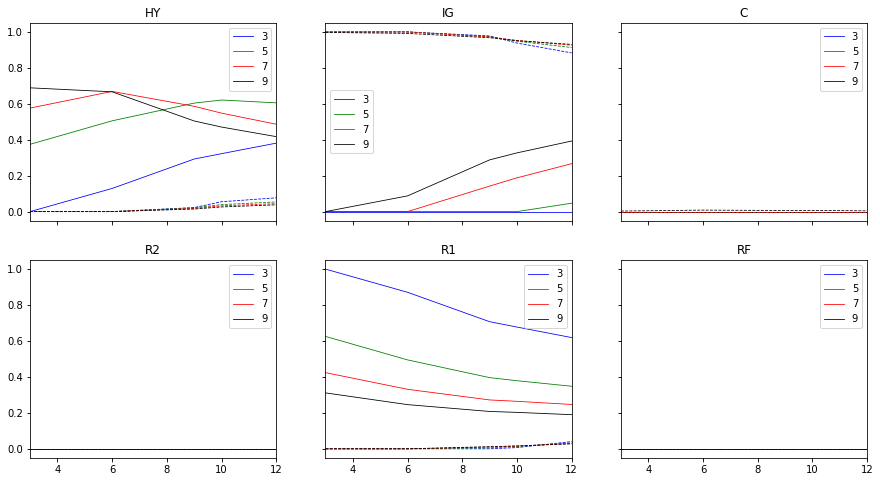

In [528]:
colors = np.array(['blue', 'green', 'red', 'black'])
fig, axes = plt.subplots(
    nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15, 8)
)
for ax, a in zip(axes.flat, abbrev):
    ax.set_title(a)
    asset_weights['aw1'][a].plot(
        legend=True, ax=ax, color=colors, linewidth=0.8
    )
    asset_weights['aw2'][a].plot(
        legend=False, ax=ax, color=colors, linewidth=0.8, linestyle='dashed'
    )
plt.show()

##### Allocations as bar charts (skip if short of time)

We now have the allocations for each asset conditional on the investment horizon and the risk sensitivity. We are ready to see what kind of compounded return and utility, respectively, we would make, when investing according to this investment strategy.

First, the image above gives some indication. But since we only care about three investment horizons, we will make bar charts instead. This removes the illusion of a gradual decline between horizons 3, 6 and 12 months.

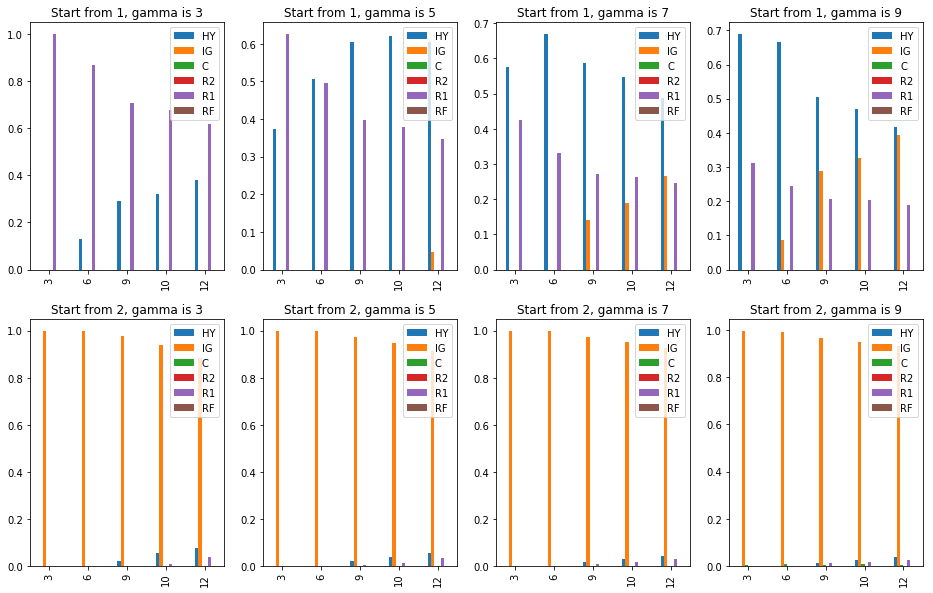

In [529]:
sts = np.hstack((np.repeat(1, len(gamma)), np.repeat(2, len(gamma))))
gms = np.hstack((gamma,gamma))

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,10))
for s, g, ax in zip(sts, gms, axes.flat):
    ws[s][g].plot.bar(ax=ax)
    ax.set_title('Start from {}, gamma is {}'.format(s, g))
plt.show()

### Out of sample test

We now consider the year of 2018. We stopped estimating parameters up until December 2017, meaning any strategies concerning the period after December 2017 are out of sample.

We will take the strategies above and compare them with the optimal allocation as computed by a constrained solver over the actual months of 2018.

First, we take a look at the data.

,RF
Date,
2018-01-31,0.0011
2018-02-28,0.0011
2018-03-30,0.0012
2018-04-30,0.0014
2018-05-31,0.0014
2018-06-29,0.0014
2018-07-31,0.0016
2018-08-31,0.0016
2018-09-28,0.0015


,High Yield,Investment Grade,Commodities,Russell 2000,Russell 1000
Date,,,,,
2018-01-31,0.005977,-0.009606,0.019665,0.025775,0.053439
2018-02-28,-0.008534,-0.016368,-0.017446,-0.039369,-0.037412
2018-03-30,-0.006059,0.002529,-0.006234,0.012843,-0.022959
2018-04-30,0.006486,-0.009322,0.025516,0.008610,0.003393
2018-05-31,-0.000278,0.005345,0.014067,0.058929,0.025202
2018-06-29,0.004007,-0.005826,-0.035586,0.007125,0.006444
2018-07-31,0.010852,0.008277,-0.021574,0.017246,0.033929
2018-08-31,0.007347,0.004927,-0.017864,0.042170,0.033877
2018-09-28,0.005555,-0.003572,0.018995,-0.024348,0.003790


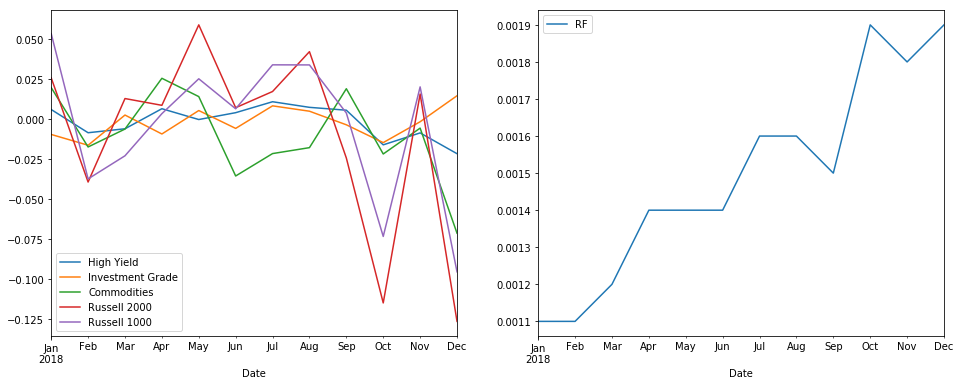

In [415]:
rf = np.array(rf_data.iloc[414:,0])
display(rf_data.iloc[414:])

returns_18 = excess_returns.iloc[413:].add(rf, axis=0)
display(returns_18)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
returns_18.plot(ax=ax1)
rf_data.iloc[414:].plot(ax=ax2)
plt.show()

In [418]:
# Extend table with the risk free rate
returns_18['RF']=rf
CR = np.exp(returns_18).cumprod()
display(CR)

,High Yield,Investment Grade,Commodities,Russell 2000,Russell 1000,RF
Date,,,,,,
2018-01-31,1.005995,0.990440,1.019859,1.026110,1.054893,1.001101
2018-02-28,0.997446,0.974361,1.002221,0.986499,1.016156,1.002202
2018-03-30,0.991420,0.976828,0.995992,0.999250,0.993091,1.003406
2018-04-30,0.997872,0.967765,1.021734,1.007890,0.996467,1.004812
2018-05-31,0.997595,0.972951,1.036208,1.069069,1.021899,1.006219
2018-06-29,1.001600,0.967299,0.999982,1.076713,1.028505,1.007629
2018-07-31,1.012528,0.975339,0.978639,1.095444,1.064000,1.009242
2018-08-31,1.019995,0.980157,0.961312,1.142627,1.100663,1.010859
2018-09-28,1.025677,0.976663,0.979747,1.115142,1.104842,1.012376


### Performance

Our portfolio is quickly providing a positive return, with a slight dip in March and April. We end the year with a loss due to erratic stock markets in December. We see that is is the Russell 1000 index which is the primary source of the loss.

In [563]:
display(ws)
display(ws[1][3].iloc[0,:])
display(ws[1][3].iloc[1,:])
display(ws[1][3].iloc[2,:])

{1: {3:         HY   IG    C   R2      R1   RF
  3   0.0000  0.0  0.0  0.0  1.0000  0.0
  6   0.1289  0.0  0.0  0.0  0.8711  0.0
  9   0.2926  0.0  0.0  0.0  0.7074  0.0
  10  0.3224  0.0  0.0  0.0  0.6776  0.0
  12  0.3810  0.0  0.0  0.0  0.6190  0.0,
  5:         HY      IG    C   R2      R1   RF
  3   0.3745  0.0000  0.0  0.0  0.6255  0.0
  6   0.5052  0.0000  0.0  0.0  0.4948  0.0
  9   0.6038  0.0000  0.0  0.0  0.3962  0.0
  10  0.6210  0.0000  0.0  0.0  0.3790  0.0
  12  0.6052  0.0468  0.0  0.0  0.3481  0.0,
  7:         HY      IG    C   R2      R1   RF
  3   0.5761  0.0000  0.0  0.0  0.4239  0.0
  6   0.6688  0.0000  0.0  0.0  0.3312  0.0
  9   0.5860  0.1420  0.0  0.0  0.2720  0.0
  10  0.5479  0.1878  0.0  0.0  0.2643  0.0
  12  0.4864  0.2668  0.0  0.0  0.2468  0.0,
  9:         HY      IG    C   R2      R1   RF
  3   0.6888  0.0000  0.0  0.0  0.3112  0.0
  6   0.6666  0.0875  0.0  0.0  0.2459  0.0
  9   0.5044  0.2878  0.0  0.0  0.2079  0.0
  10  0.4705  0.3268  0.0  0.0  

HY    0.0
IG    0.0
C     0.0
R2    0.0
R1    1.0
RF    0.0
Name: 3, dtype: float64

HY    0.1289
IG    0.0000
C     0.0000
R2    0.0000
R1    0.8711
RF    0.0000
Name: 6, dtype: float64

HY    0.2926
IG    0.0000
C     0.0000
R2    0.0000
R1    0.7074
RF    0.0000
Name: 9, dtype: float64

Start is:  1


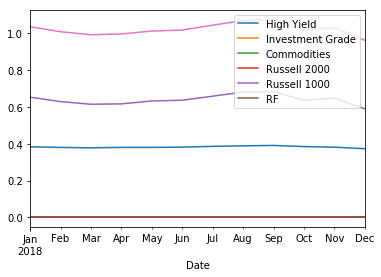

Date
2018-01-31    1.036263
2018-02-28    1.009027
2018-03-30    0.992455
2018-04-30    0.997002
2018-05-31    1.012639
2018-06-29    1.018254
2018-07-31    1.044390
2018-08-31    1.069928
2018-09-28    1.074680
2018-10-31    1.020039
2018-11-30    1.029660
2018-12-31    0.962413
dtype: float64

Start is:  2


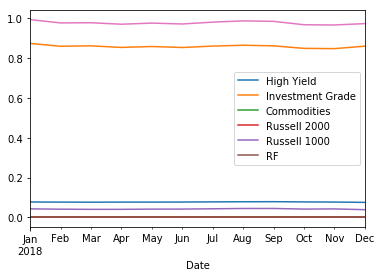

Date
2018-01-31    0.994231
2018-02-28    0.977816
2018-03-30    0.978603
2018-04-30    0.971231
2018-05-31    0.976814
2018-06-29    0.972397
2018-07-31    0.981765
2018-08-31    0.988069
2018-09-28    0.985588
2018-10-31    0.968585
2018-11-30    0.967345
2018-12-31    0.974332
dtype: float64

In [548]:
# Out of sample weights: start: 1, gamma: 3, maturity: 12
oos_gamma = 3
wealth = {
    'w1': {},
    'w2': {}
}

for s, wi in enumerate(wealth):
    print('Start is: ', s+1)
    oos_weights=np.array(ws[s+1][oos_gamma].iloc[4,:]) # index 4 is month 12
    wealth[wi] = oos_weights*CR
    wealth[wi].plot()
    wealth[wi].sum(axis=1).plot()
    plt.show()
    # wealth at end of period
    display(wealth[wi].sum(axis=1))

### Optimal portfolio given realised data

To compare our simulated portfolio with some benchmark, we can now take the actual data from 2018 and find the optimal allocation there.

We note that the actual data should catch the slump in December 2018, and we thus expect to see a different allocation which outperforms our simulated allocation.

What is interesting to see is how the performance compares over the course of the year. We update the expected utility function from before, as we have extended the data frame to include the risk free asset.

In [549]:
cr = np.exp(np.sum(returns_18, axis = 0))
print(cr)

wr = oos_weights*cr
print(wr)

print('Compounded wealth is: ', np.sum(wr))
print('Corresponding utility is: ', np.sum(wr)**(1-oos_gamma)/(1-oos_gamma))

High Yield          0.979174
Investment Grade    0.974926
Commodities         0.887545
Russell 2000        0.889726
Russell 1000        0.952097
RF                  1.018061
dtype: float64
High Yield          0.075103
Investment Grade    0.860859
Commodities         0.000000
Russell 2000        0.000000
Russell 1000        0.038370
RF                  0.000000
dtype: float64
Compounded wealth is:  0.9743315884702284
Corresponding utility is:  -0.5266916564372708


In [535]:
# @jit(nopython=True)
def expectedUtilityMult2(w, returns, g):
    # CR: compounded return
    CR = np.exp(np.sum(returns, axis=0))
    
    numerator = np.sum(w * CR) ** (1 - g)
    denonimator = 1 - g
    return -numerator / denonimator * 100000

expectedUtilityMult2(oos_weights, returns_18, oos_gamma)/100000

0.5259472111815323

### Ex post optimal weights

We are now ready to make the constrained optimisation yet again:

In [538]:
# Assets plus bank account
ApB = 6

# Standardised weights on the unit interval
w = np.random.random(ApB)
w /= np.sum(w)

# Arguments other than w to be passed to expectedUtilityMult
args = returns_18, oos_gamma

# Function over which to optimise
f = expectedUtilityMult2

# Results
oos_result = boundedOptimiser(f, w, args, ApB, method='SLSQP')
opt_weights = oos_result.x
np.round(opt_weights, 4)

array([0., 0., 0., 0., 0., 1.])

The allocation has 100 pct. allocation into the risk free asset. To see how this looks, we can multiply over our actual return data for 2018.

Date
2018-01-31    1.001101
2018-02-28    1.002202
2018-03-30    1.003406
2018-04-30    1.004812
2018-05-31    1.006219
2018-06-29    1.007629
2018-07-31    1.009242
2018-08-31    1.010859
2018-09-28    1.012376
2018-10-31    1.014301
2018-11-30    1.016129
2018-12-31    1.018061
dtype: float64

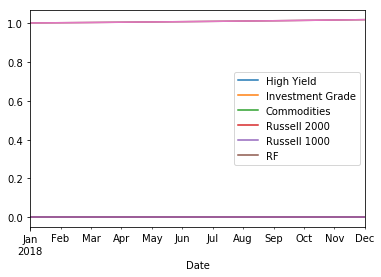

In [540]:
opt_wealth = opt_weights*CR
display(opt_wealth.sum(axis=1))

opt_wealth.plot()
opt_wealth.sum(axis=1).plot()

As we note, 100 pct. investment in the risk-free rate outperforms our suggested portfolio.

From the tables we see that the ex ante optimal allocations have large returns of 7 pct. at one point, before crashing in December. The ex post optimal allocation never achieves this higher return, but it ends with a positive return as the risk free rate is not affected by neither the first tumble in October and the second free fall in December.

We can compare the two in the same plot to get a visual appreciation for these results:

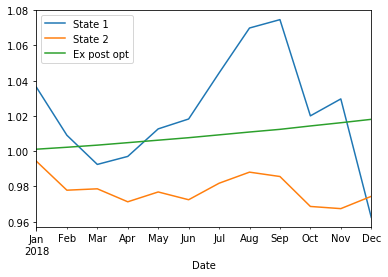

In [557]:
wealth['w1'].sum(axis=1).plot(label='State 1')
wealth['w2'].sum(axis=1).plot(label='State 2')
opt_wealth.sum(axis=1).plot(label='Ex post opt')
plt.legend()
plt.show()

#### Repeat for other risk tolerances

We can now repeat this same exercise for other risk tolerance levels.

Date
2018-01-31    1.040585
2018-02-28    1.010681
2018-03-30    0.992602
2018-04-30    0.996878
2018-05-31    1.014787
2018-06-29    1.020633
2018-07-31    1.048940
2018-08-31    1.077059
2018-09-28    1.081679
2018-10-31    1.021575
2018-11-30    1.033810
2018-12-31    0.960020
dtype: float64

Date
2018-01-31    1.025368
2018-02-28    1.004859
2018-03-30    0.992082
2018-04-30    0.997315
2018-05-31    1.007224
2018-06-29    1.012260
2018-07-31    1.032922
2018-08-31    1.051956
2018-09-28    1.057042
2018-10-31    1.016167
2018-11-30    1.019200
2018-12-31    0.968446
dtype: float64

Date
2018-01-31    1.017086
2018-02-28    0.999257
2018-03-30    0.989803
2018-04-30    0.993214
2018-05-31    1.000706
2018-06-29    1.004048
2018-07-31    1.021248
2018-08-31    1.036280
2018-09-28    1.040250
2018-10-31    1.007352
2018-11-30    1.007717
2018-12-31    0.971206
dtype: float64

Date
2018-01-31    1.011785
2018-02-28    0.994792
2018-03-30    0.987667
2018-04-30    0.989015
2018-05-31    0.995655
2018-06-29    0.997422
2018-07-31    1.012628
2018-08-31    1.025403
2018-09-28    1.028132
2018-10-31    0.999503
2018-11-30    0.999005
2018-12-31    0.972420
dtype: float64

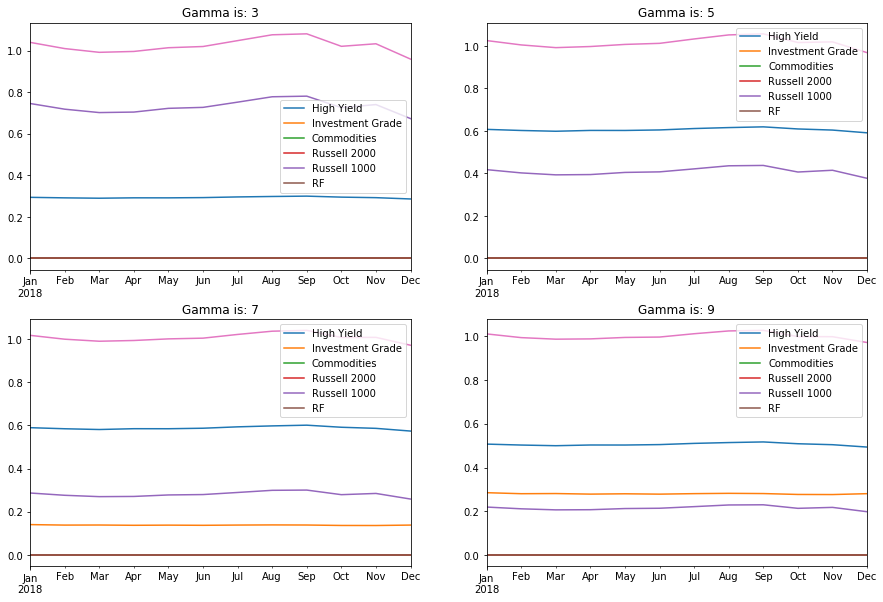

In [558]:
# [o]ut of sample [w]eights, gamma = 3 ==> [o][w]3
# Out of sample weights: start: 1, gamma: 3, maturity: 12
os1, os2 = 1, 2

oos_weights=[np.array(ws[os1][osg].iloc[2,:]) for osg in gamma]

# wealth at end of period
owealth = [oos_weights[i]*CR for i in range(len(gamma))]

for i in range(len(gamma)):
    display(owealth[i].sum(axis=1))

fig, axes = plt.subplots(2,2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    owealth[i].plot(ax=ax)
    owealth[i].sum(axis=1).plot(ax=ax)
    ax.set_title('Gamma is: {}'.format(gamma[i]))
    ax.set_xlabel('')
plt.show()

##### Part result

We see that for all the portfolio we end up losing money eventually. We also see that all the portfolios manage to outperform the best performance of the risk free rate at some point during 2018. The problem becomes the fact that they cannot sustain this high return.

From the below result, we also see that, in alignment with intution since we started at the most risk tolerant level, every ex post portfolio has full allocation in the risk free asset. 

In [559]:
opt_weights=np.zeros((4,6))
for i, g in enumerate([3,5,7,9]):
    args = returns_18, g
    oos_result = boundedOptimiser(f, w, args, ApB, method='SLSQP')
    opt_weights[i] = np.round(oos_result.x, 4)
    print(opt_weights[i])

[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1.]


We can again plot the optimal ex-post portfolio together with the ex-ante optimal portfolios. Be careful not to let the `y-axis` fool you - they are quite different among each level of risk aversion.

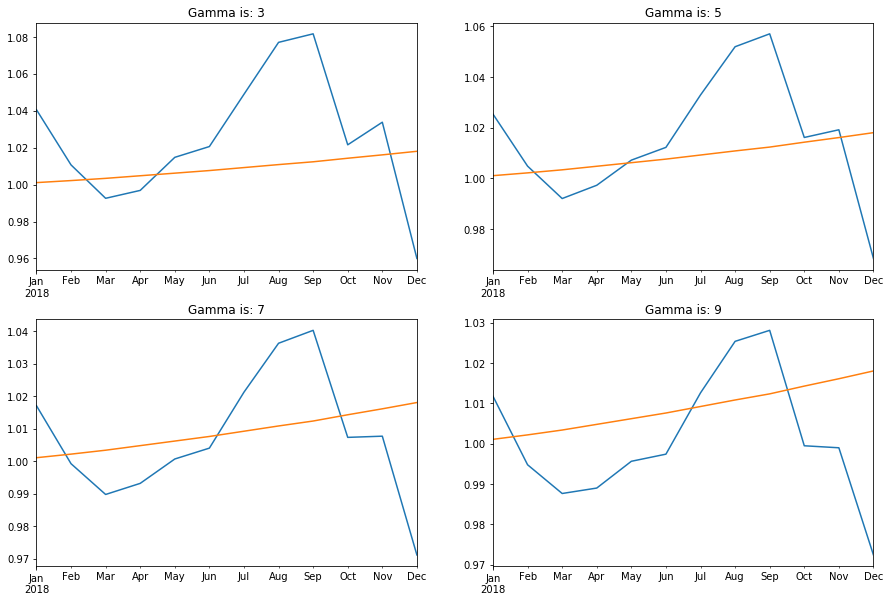

In [560]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    owealth[i].sum(axis=1).plot(ax=ax)
    opt_wealth.sum(axis=1).plot(ax=ax)
    ax.set_title('Gamma is: {}'.format(gamma[i]))
    ax.set_xlabel('')
plt.show()

#### Believing we start in a crash state

Believing we start in state 2 should make us more risk averse. Consequently, we should be able to get closer to the performance of the risk free asset.

Date
2018-01-31    0.990789
2018-02-28    0.974878
2018-03-30    0.977155
2018-04-30    0.968439
2018-05-31    0.973503
2018-06-29    0.968068
2018-07-31    0.976172
2018-08-31    0.981049
2018-09-28    0.977761
2018-10-31    0.963449
2018-11-30    0.961688
2018-12-31    0.975021
dtype: float64

Date
2018-01-31    0.991105
2018-02-28    0.975067
2018-03-30    0.977222
2018-04-30    0.968552
2018-05-31    0.973728
2018-06-29    0.968345
2018-07-31    0.976589
2018-08-31    0.981628
2018-09-28    0.978368
2018-10-31    0.963727
2018-11-30    0.962091
2018-12-31    0.974897
dtype: float64

Date
2018-01-31    0.991358
2018-02-28    0.975190
2018-03-30    0.977252
2018-04-30    0.968591
2018-05-31    0.973879
2018-06-29    0.968523
2018-07-31    0.976886
2018-08-31    0.982067
2018-09-28    0.978814
2018-10-31    0.963879
2018-11-30    0.962372
2018-12-31    0.974776
dtype: float64

Date
2018-01-31    0.991612
2018-02-28    0.975361
2018-03-30    0.977349
2018-04-30    0.968871
2018-05-31    0.974278
2018-06-29    0.968721
2018-07-31    0.976947
2018-08-31    0.982044
2018-09-28    0.978908
2018-10-31    0.963811
2018-11-30    0.962351
2018-12-31    0.974173
dtype: float64

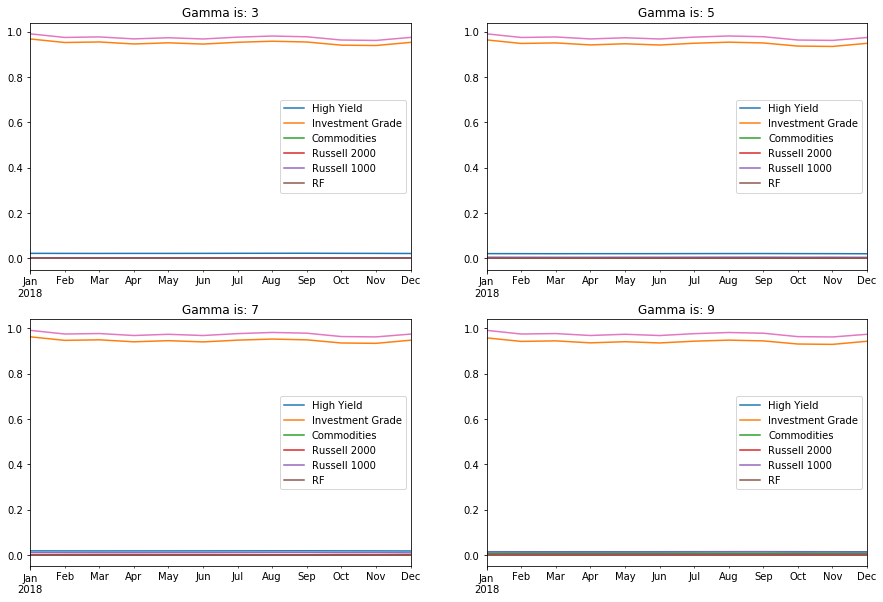

In [561]:
# [o]ut of sample [w]eights, gamma = 3 ==> [o][w]3
# Out of sample weights: start: 1, gamma: 3, maturity: 12
os1, os2 = 1, 2

oos_weights=[np.array(ws[os2][osg].iloc[2,:]) for osg in gamma]

# wealth at end of period
owealth = [oos_weights[i]*CR for i in range(len(gamma))]

for i in range(len(gamma)):
    display(owealth[i].sum(axis=1))

fig, axes = plt.subplots(2,2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    owealth[i].plot(ax=ax)
    owealth[i].sum(axis=1).plot(ax=ax)
    ax.set_title('Gamma is: {}'.format(gamma[i]))
    ax.set_xlabel('')
plt.show()

The evidence is not in our favour. It seems that not only are we ending up losing money, we are additionally never able to make money off these strategies.

In hindsight this does perhaps make sense. We are coming from a good state, and should be trading in assets that perform well in these dynamics. Nevertheless we are trading in assets which perform poorly in these dynamics, and well in crash states.

What we do notice, however, is that we manage to make money in December 2018, which we were never able to do in the other portfolio. Thus the model we have made seems to be suggesting the right strategies, conditionally on knowing the state in which we are in. However, as a final note, actually knowing history in advance is even better - we have never been able to outperform the optimal ex post portfolio.

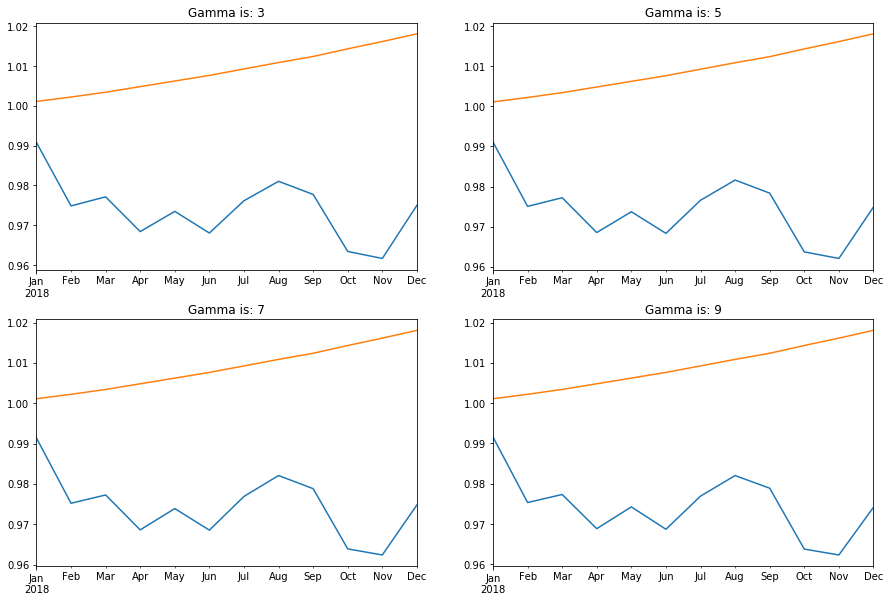

In [562]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    owealth[i].sum(axis=1).plot(ax=ax)
    opt_wealth.sum(axis=1).plot(ax=ax)
    ax.set_title('Gamma is: {}'.format(gamma[i]))
    ax.set_xlabel('')
plt.show()

### Changing the investment horizon

We made the analysis according to an investment horizon which included two crash months, October and December.

We can instead consider other investment horizons, e.g. 3 months, 6 months or 10 months.

STARTING STATE IS 1


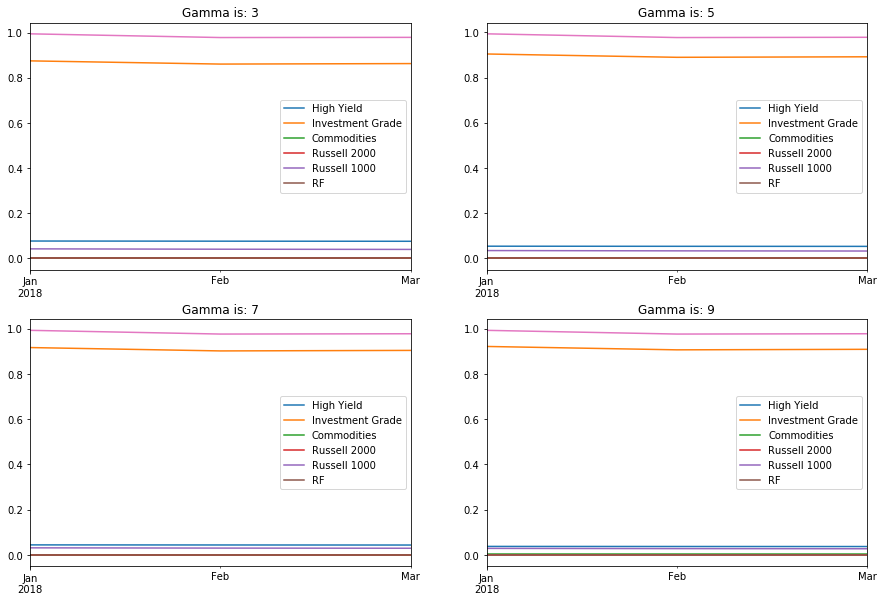

STARTING STATE IS 2


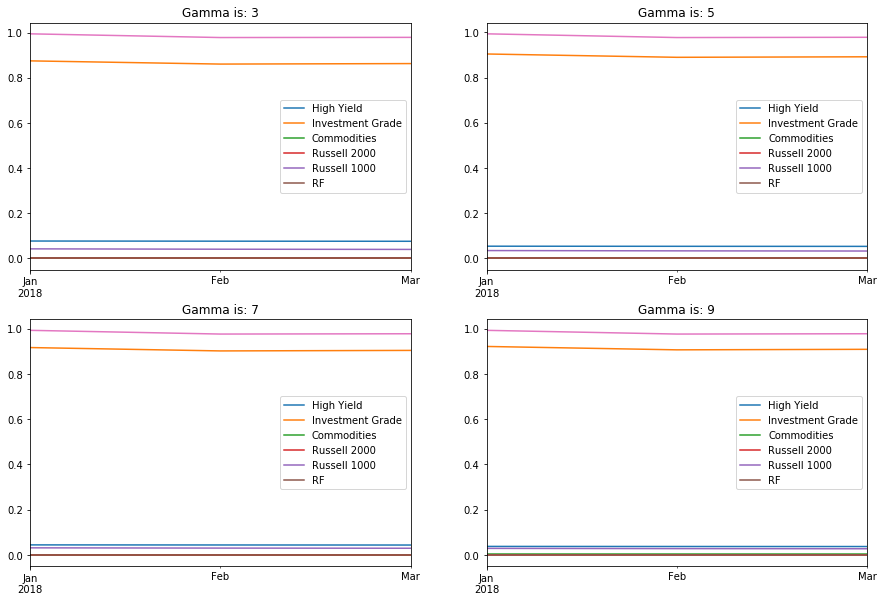

In [479]:
# [o]ut of sample [w]eights, gamma = 3 ==> [o][w]3
# Out of sample weights: start: 1, gamma: 3, maturity: 12
os1, os2 = 1, 2

oos_weights=[np.array(ws[os1][osg].iloc[2,:]) for osg in gamma]

# wealth at end of period
owealth1 = [oos_weights[i]*CR.iloc[:3,:] for i in range(len(gamma))]

print('STARTING STATE IS 1')
fig, axes = plt.subplots(2,2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    owealth[i].plot(ax=ax)
    owealth[i].sum(axis=1).plot(ax=ax)
    ax.set_title('Gamma is: {}'.format(gamma[i]))
    ax.set_xlabel('')
plt.show()

oos_weights=[np.array(ws[os2][osg].iloc[2,:]) for osg in gamma]

# wealth at end of period
owealth2 = [oos_weights[i]*CR.iloc[:3,:] for i in range(len(gamma))]

print('STARTING STATE IS 2')
fig, axes = plt.subplots(2,2, figsize=(15,10))
for i, ax in enumerate(axes.flat):
    owealth2[i].plot(ax=ax)
    owealth2[i].sum(axis=1).plot(ax=ax)
    ax.set_title('Gamma is: {}'.format(gamma[i]))
    ax.set_xlabel('')
plt.show()

In [597]:
epw_keys = [3,6,9,10,12]

epw = {}

for k in epw_keys:
    epw[k] = np.zeros((4,6))
    print('Maturity is: ', k)
    for i, g in enumerate([3,5,7,9]):
        args = returns_18.iloc[:k,:], g
        oos_result = boundedOptimiser(f, w, args, ApB, method='SLSQP')
        epw[k][i] = np.round(oos_result.x, 4)
        print('Optimal for gamma={}'.format(g), epw[k][i])

Maturity is:  3
Optimal for gamma=3 [0. 0. 0. 0. 0. 1.]
Optimal for gamma=5 [0. 0. 0. 0. 0. 1.]
Optimal for gamma=7 [0. 0. 0. 0. 0. 1.]
Optimal for gamma=9 [0. 0. 0. 0. 0. 1.]
Maturity is:  6
Optimal for gamma=3 [0. 0. 0. 1. 0. 0.]
Optimal for gamma=5 [0. 0. 0. 1. 0. 0.]
Optimal for gamma=7 [0. 0. 0. 1. 0. 0.]
Optimal for gamma=9 [0. 0. 0. 1. 0. 0.]
Maturity is:  9
Optimal for gamma=3 [0. 0. 0. 1. 0. 0.]
Optimal for gamma=5 [0. 0. 0. 1. 0. 0.]
Optimal for gamma=7 [0. 0. 0. 1. 0. 0.]
Optimal for gamma=9 [0. 0. 0. 1. 0. 0.]
Maturity is:  10
Optimal for gamma=3 [0. 0. 0. 0. 1. 0.]
Optimal for gamma=5 [0. 0. 0. 0. 1. 0.]
Optimal for gamma=7 [0. 0. 0. 0. 1. 0.]
Optimal for gamma=9 [0. 0. 0. 0. 1. 0.]
Maturity is:  12
Optimal for gamma=3 [0. 0. 0. 0. 0. 1.]
Optimal for gamma=5 [0. 0. 0. 0. 0. 1.]
Optimal for gamma=7 [0. 0. 0. 0. 0. 1.]
Optimal for gamma=9 [0. 0. 0. 0. 0. 1.]


### Ex post optimal allocation is concentrated

From the above we see that ex post, one asset class performs better than a mix thereof. We can accept this finding intuitively, as, knowing what returns are, there is no danger in volatility.

### For all parameters

We now generalise the portfolio asset allocation problem to compare with several different parameters in (a) starting state, (b) investment horizon and (c) risk sensitivity.

Start state is:  1
Investment horizon:  3
Final return for g=3 is: 0.9931
Final return for g=5 is: 0.9925
Final return for g=7 is: 0.9921
Final return for g=9 is: 0.9919


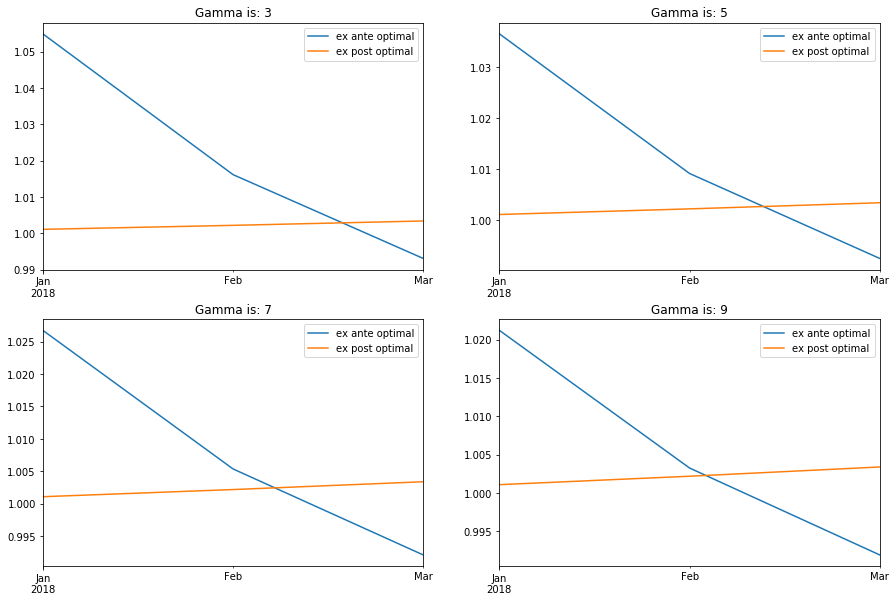

Investment horizon:  6
Final return for g=3 is: 1.025
Final return for g=5 is: 1.0149
Final return for g=7 is: 1.0105
Final return for g=9 is: 1.0052


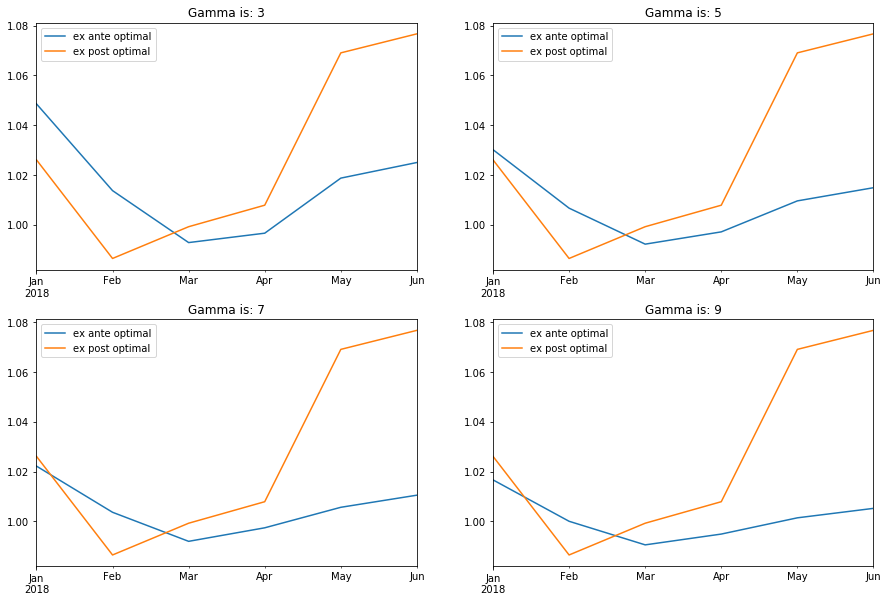

Investment horizon:  9
Final return for g=3 is: 1.0817
Final return for g=5 is: 1.057
Final return for g=7 is: 1.0403
Final return for g=9 is: 1.0281


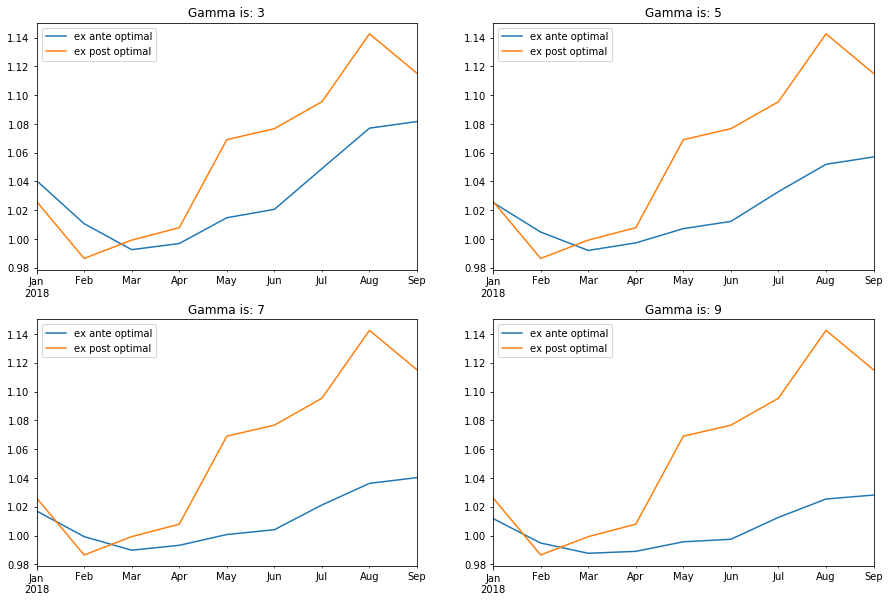

Investment horizon:  10
Final return for g=3 is: 1.0211
Final return for g=5 is: 1.0159
Final return for g=7 is: 1.0051
Final return for g=9 is: 0.9975


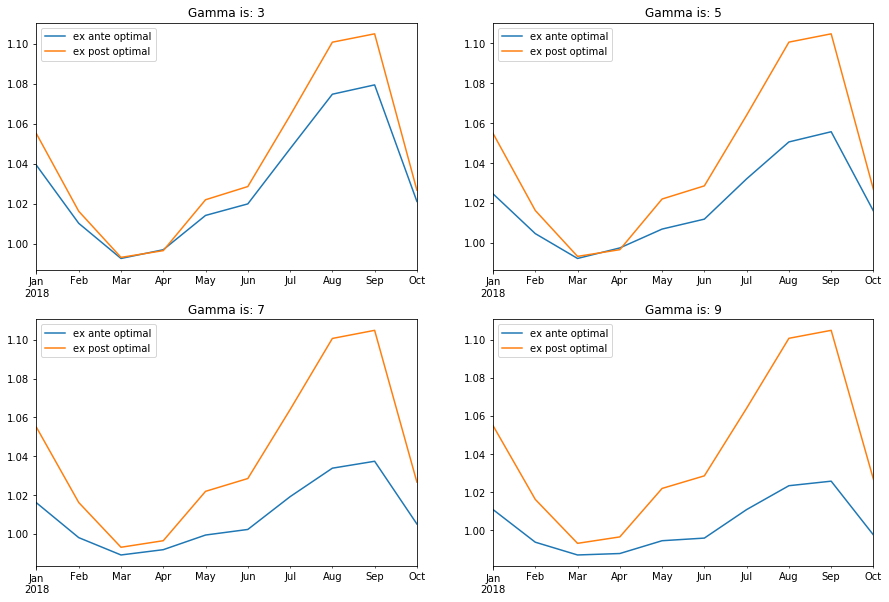

Investment horizon:  12
Final return for g=3 is: 0.9624
Final return for g=5 is: 0.9696
Final return for g=7 is: 0.9714
Final return for g=9 is: 0.9724


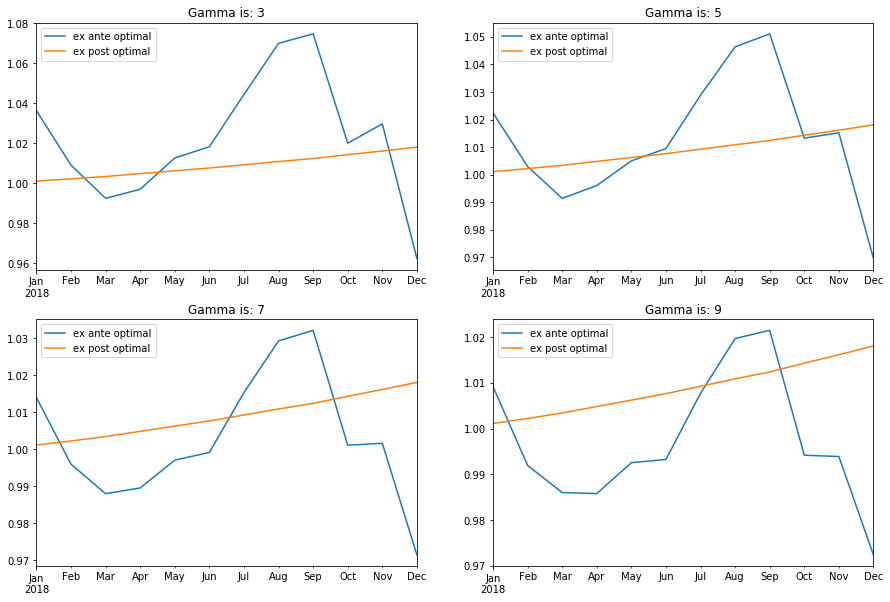

Start state is:  2
Investment horizon:  3
Final return for g=3 is: 0.9768
Final return for g=5 is: 0.9768
Final return for g=7 is: 0.9768
Final return for g=9 is: 0.9769


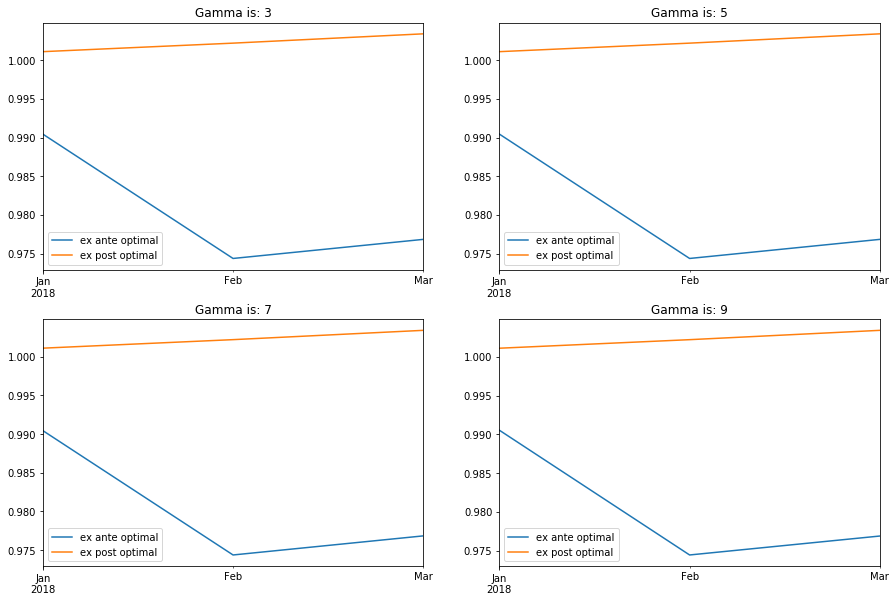

Investment horizon:  6
Final return for g=3 is: 0.9673
Final return for g=5 is: 0.9673
Final return for g=7 is: 0.9673
Final return for g=9 is: 0.9676


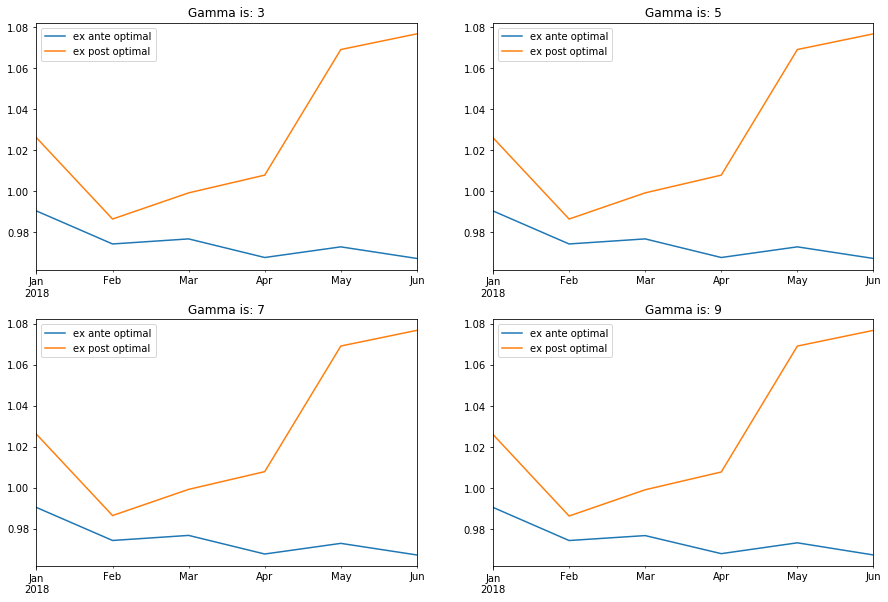

Investment horizon:  9
Final return for g=3 is: 0.9778
Final return for g=5 is: 0.9784
Final return for g=7 is: 0.9788
Final return for g=9 is: 0.9789


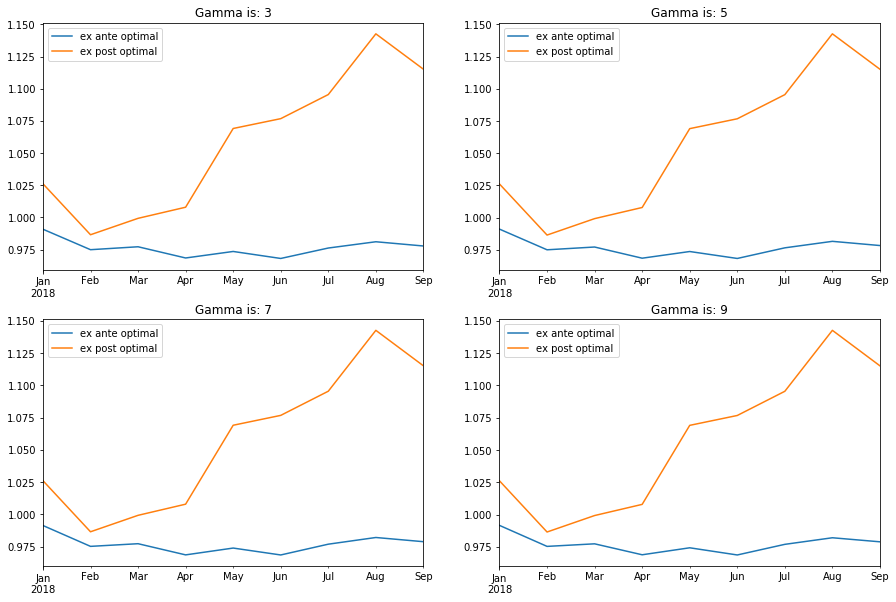

Investment horizon:  10
Final return for g=3 is: 0.9654
Final return for g=5 is: 0.965
Final return for g=7 is: 0.9649
Final return for g=9 is: 0.9646


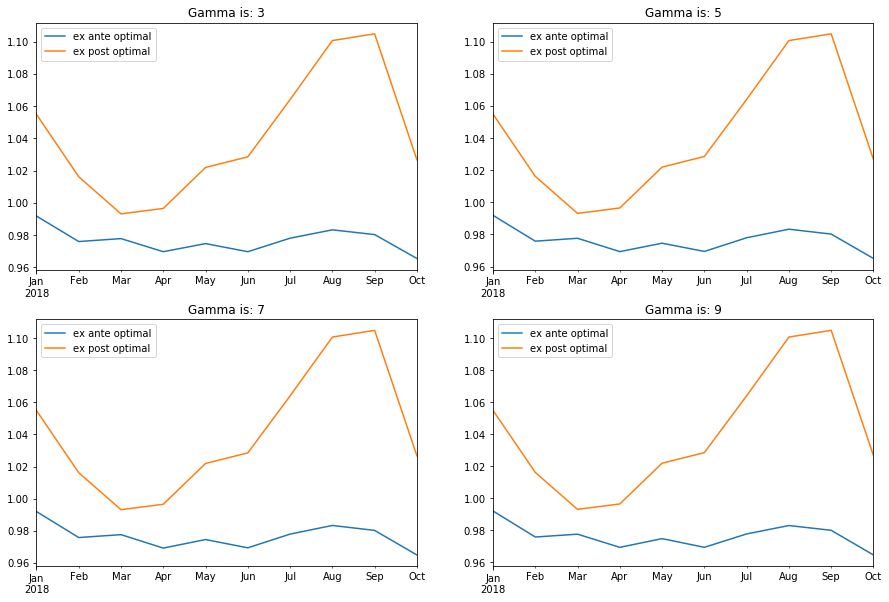

Investment horizon:  12
Final return for g=3 is: 0.9743
Final return for g=5 is: 0.9744
Final return for g=7 is: 0.9744
Final return for g=9 is: 0.9741


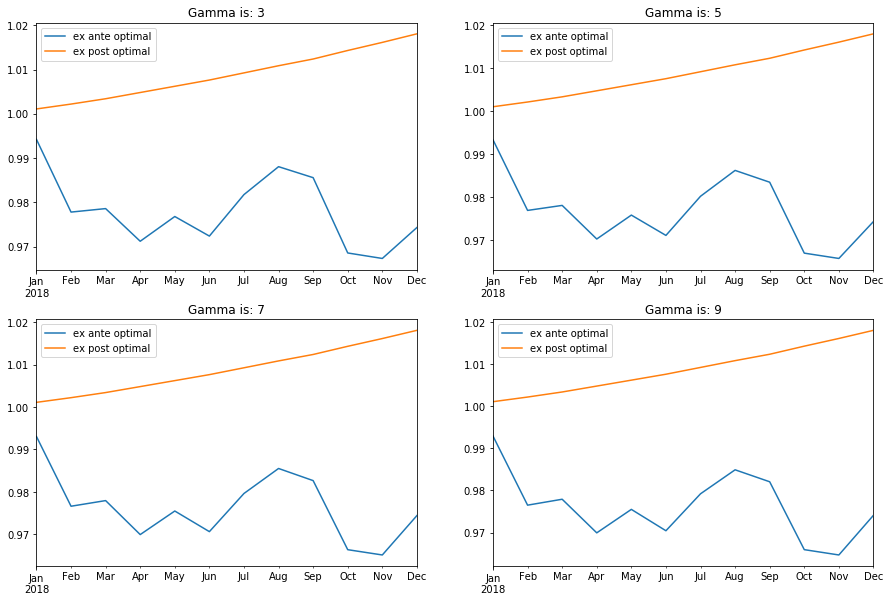

In [616]:
for s in start_states:
    print('Start state is: ', s)
    for j, k in enumerate(epw_keys):
        print('Investment horizon: ', k)
        
        # .iloc[j,:] has j be the maturity by index -> [3,6,9,10,12]
        ows = [np.array(ws[s][g].iloc[j,:]) for g in gamma]
        
        fig, axes = plt.subplots(2,2, figsize=(15,10))        
        for i, ax in enumerate(axes.flat):
            
            # i is the gamma [3,5,7,9]
            owealth = ows[i]*CR.iloc[:k,:]
            opt_wealth = epw[k][i]*CR.iloc[:k,:]
            
            # Actual plotting
            owealth.sum(axis=1).plot(ax=ax, label='ex ante optimal')
            opt_wealth.sum(axis=1).plot(ax=ax, label='ex post optimal')
            
            # Tidying up
            ax.set_title('Gamma is: {}'.format(gamma[i]))
            ax.set_xlabel('')
            ax.legend()
            
            print('Final return for g={} is: {}'.format(
                gamma[i], np.round(owealth.iloc[k-1].sum(), 4))
            )
            
        plt.show()

## Conclusion

We have now compared the optimal portfolio allocation for a 2 state Hidden Markov Switching model across parameters:

* States: 1, 2
* Maturities: 3, 6, 9, 10, 12
* Risk sensitivity: 3, 5, 7, 9

In addition, we find the following conclusions:
1. We find that we can never outperform the ex post optimal allocation as expected.

2. For an investment horizon of `10 months` and starting in `state 1` we almost perform as good as the ex post allocation.

3. Starting in the wrong state (state 2) is a bad idea. Our allocation is not in alignment with market conditions. We never get near the ex post allocation.

4. Starting in the right state (state 1) allows us to outperform the ex post allocation at some point in the investment period always.

5. We are never prepared for the crashes of October and December in the scenario of starting in state 1.

6. The crash in December is handled well for the allocations starting in state 2. The September crash is not handled well.

7. Only time we make positive profits is when the investment horizon is either 6, 9, or 10 months, conditional on starting the allocation from state 1.

8. If we believe we start in state 1, then a high risk tolerance (large $\gamma$) leads to the highest profits over the period we have considered.

9. If we believe we start in state 2, then a high risk aversion (low $\gamma$) leads to the highest profits for short maturities (9 months or less). This difference is not pronounced.